<a href="https://colab.research.google.com/github/El-Nico/tensorflow-notes/blob/main/regression_excersises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🛠 Exercises
1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  * Building a larger model (how does one with 4 dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
  * What happens if you train for longer (say 300 epochs instead of 200)? 
4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.


1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

In [83]:
#creating linear regression data with numpy
import numpy as np
import matplotlib.pyplot as plt

In [84]:
#create features
X=np.arange(1,6,0.5)
X

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5])

In [85]:
#create labels
Y=np.arange(10,60,5)
Y

array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])

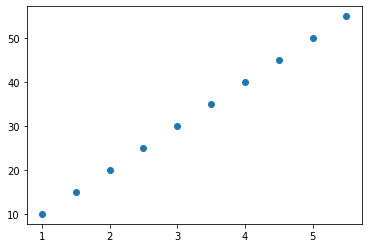

In [86]:
#visualize
plt.scatter(X, Y)

2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [87]:
#imports
import tensorflow as tf


In [88]:
#tensorize numpy array
X=tf.constant(X)
Y=tf.constant(Y)
X,Y

(<tf.Tensor: shape=(10,), dtype=float64, numpy=array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5])>,
 <tf.Tensor: shape=(10,), dtype=int64, numpy=array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])>)

In [89]:
#using the keras sequential api to make predictions

#create model usin the sequential api
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape=[1]),
                             tf.keras.layers.Dense(1),
                              tf.keras.layers.Dense(1),
                              tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=30)

Epoch 1/30
1/1 [==============================] - 0s 405ms/step - loss: 30.3555 - mae: 30.3555
Epoch 2/30
1/1 [==============================] - 0s 18ms/step - loss: 29.9233 - mae: 29.9233
Epoch 3/30
1/1 [==============================] - 0s 8ms/step - loss: 29.4024 - mae: 29.4024
Epoch 4/30
1/1 [==============================] - 0s 8ms/step - loss: 28.7659 - mae: 28.7659
Epoch 5/30
1/1 [==============================] - 0s 12ms/step - loss: 27.9763 - mae: 27.9763
Epoch 6/30
1/1 [==============================] - 0s 10ms/step - loss: 26.9796 - mae: 26.9796
Epoch 7/30
1/1 [==============================] - 0s 7ms/step - loss: 25.6966 - mae: 25.6966
Epoch 8/30
1/1 [==============================] - 0s 11ms/step - loss: 24.0072 - mae: 24.0072
Epoch 9/30
1/1 [==============================] - 0s 12ms/step - loss: 21.7224 - mae: 21.7224
Epoch 10/30
1/1 [==============================] - 0s 9ms/step - loss: 18.5319 - mae: 18.5319
Epoch 11/30
1/1 [==============================] - 0s 13ms/ste

In [90]:
X

<tf.Tensor: shape=(10,), dtype=float64, numpy=array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5])>

In [91]:
lastval=X[-1].numpy()+0.5

In [92]:
stopval=lastval+(0.5*10)

In [93]:
#create test features and labels
X_test=tf.constant(np.arange(lastval, stopval, 0.5 ))
X_test

<tf.Tensor: shape=(10,), dtype=float64, numpy=array([ 6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5])>

In [94]:
Y

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])>

In [95]:
Y_test=tf.cast(X_test*10, tf.int32)
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 60,  65,  70,  75,  80,  85,  90,  95, 100, 105], dtype=int32)>

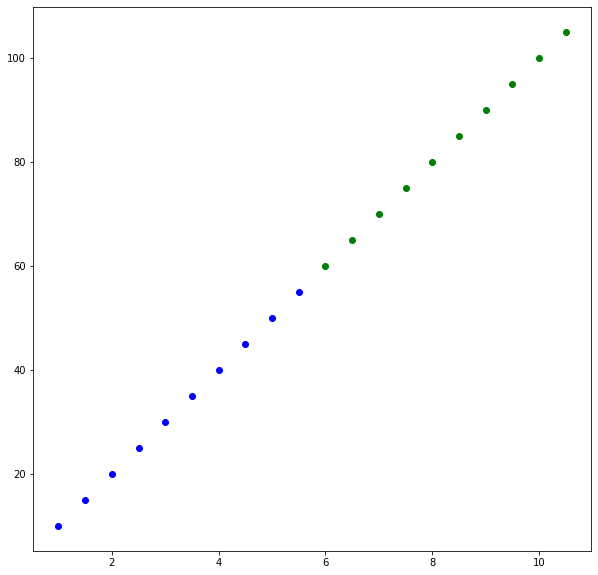

In [96]:
#visualize train and test data
plt.figure(figsize=(10,10))
#plot traing data in blue
plt.scatter(X, Y, c='b', label='Trainining data')
#plot test data in green
plt.scatter(X_test, Y_test, c='g', label="test data")

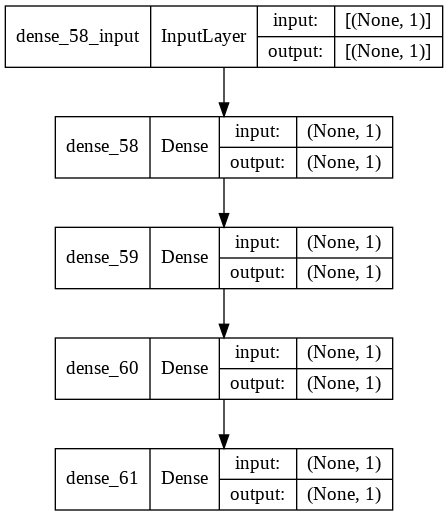

In [97]:
#visualizing model and predictions
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [98]:
#making predictions with the model
Y_preds= model.predict(X_test)

In [99]:
Y_preds

array([[ 78.91115 ],
       [ 85.2925  ],
       [ 91.67384 ],
       [ 98.05519 ],
       [104.43654 ],
       [110.81788 ],
       [117.19922 ],
       [123.580574],
       [129.96191 ],
       [136.34326 ]], dtype=float32)

In [100]:
#building a plotting function
def plot_predictions(train_data=X,
                     train_labels=Y,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=Y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

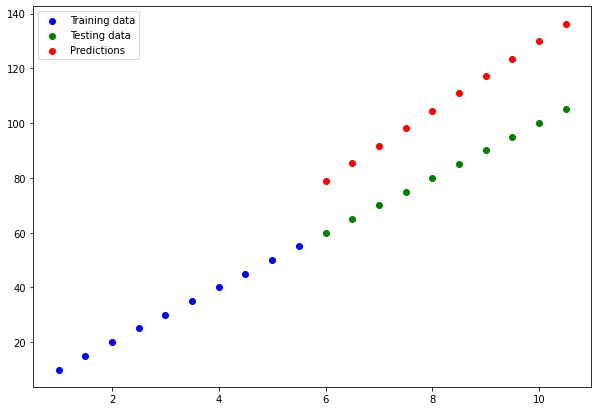

In [102]:
plot_predictions(train_data=X,
                     train_labels=Y,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=Y_preds)

3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  * Building a larger model (how does one with 4 dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
  * What happens if you train for longer (say 300 epochs instead of 200)? 

In [103]:
#importing the insurance dataset
import pandas as pd

In [104]:
#read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [105]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [106]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [107]:
#encoding cat data
insurance_one_hot= pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [108]:
#creating features and labels
X=insurance_one_hot.drop("charges", axis=1)
Y=insurance_one_hot["charges"]

In [109]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
#data normalization and standardization

In [ ]:
#ORIGINAL MODEL


# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)
